<a href="https://colab.research.google.com/github/GCapr/teaching_material/blob/Padova-2025-Summer-school-scuola-Galileiana/ML_Econ_Image_Analysis_Full_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML for Economics – Image Analysis
Welcome! In this notebook, we’ll walk through a simple example of using Python and machine learning tools to analyze image data for an economics-related question. Don’t worry if you haven’t coded before – each step will be explained, and you can ask an AI assistant for help at any point. We'll:
- Load and view satellite images
- Analyze brightness to compare regions
- Use a pre-trained ML model to classify image content

📌 Requirements: Internet connection (Google Colab recommended).

## Setup and Imports

In [ ]:
!pip install Pillow requests numpy matplotlib tensorflow --quiet

In [ ]:
import numpy as np
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
from tensorflow.keras.applications import ResNet50, resnet50

## Load a Satellite Image from NASA

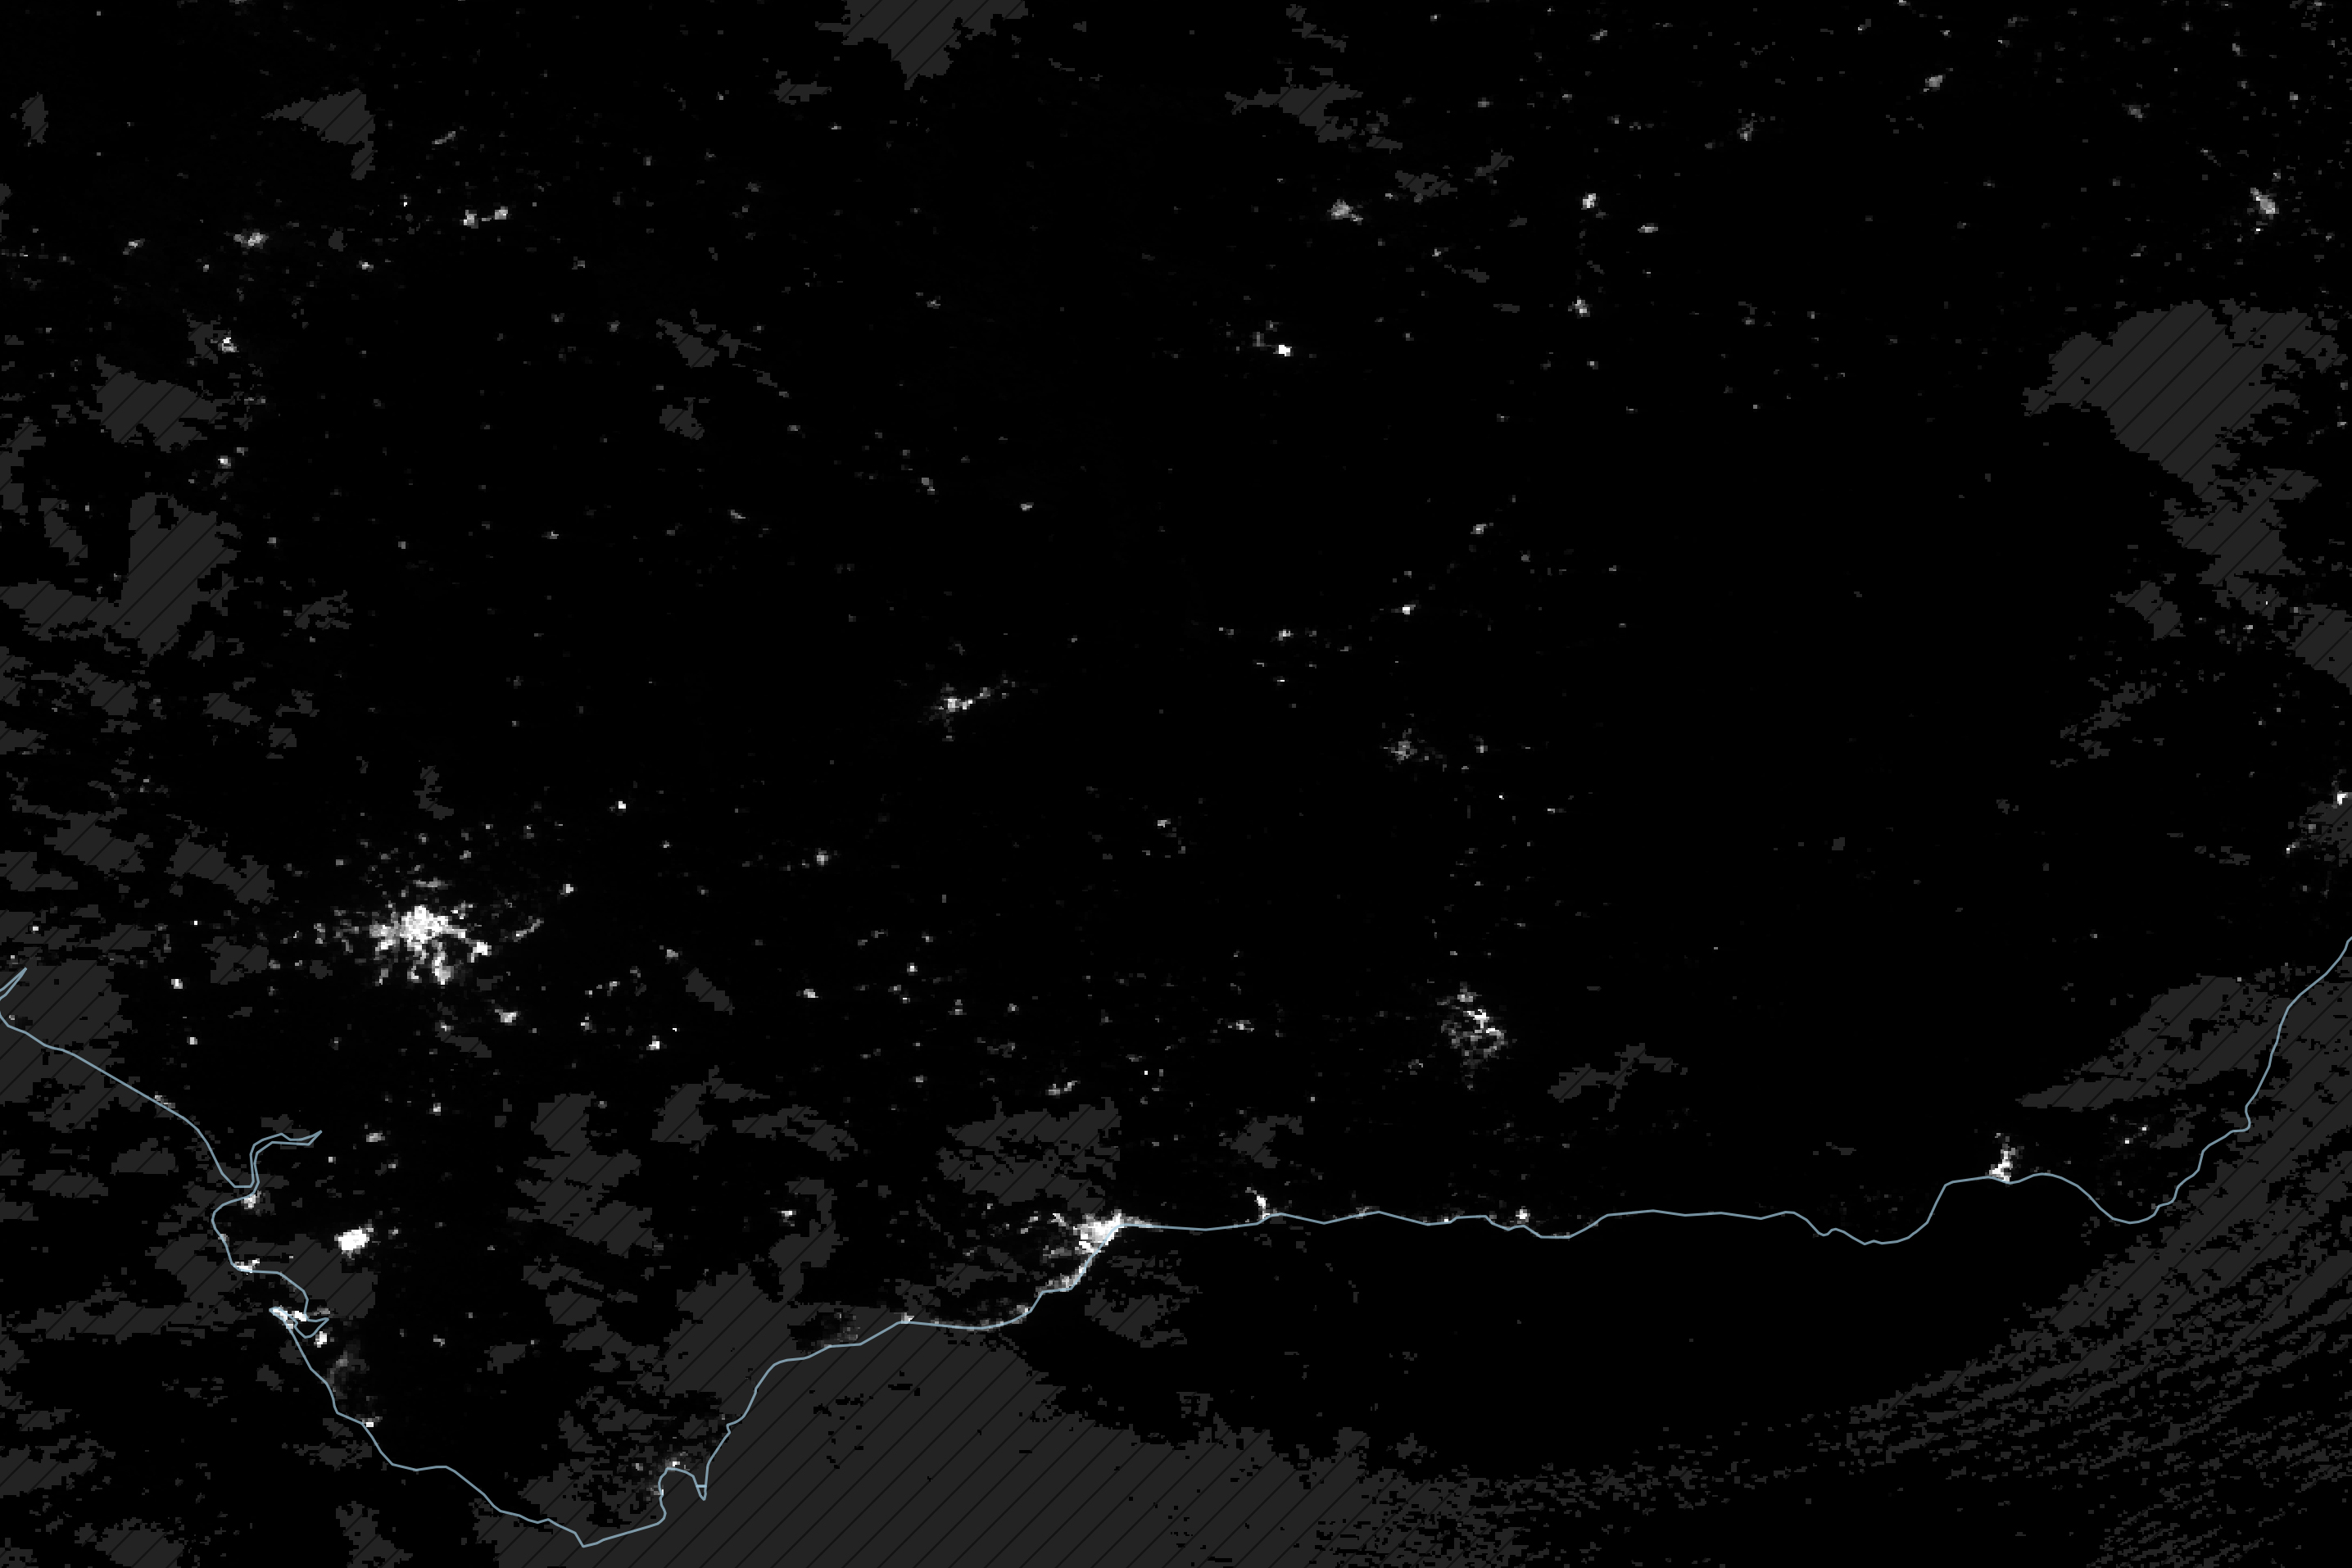

In [ ]:
url = 'https://eoimages.gsfc.nasa.gov/images/imagerecords/154000/154238/spainpowerbmnodata_vir_20250429_lrg.jpg'
response = requests.get(url)
image_data = Image.open(BytesIO(response.content))
image_data.save('Blackout_andalucia.jpg')
display(image_data)

## Inspect Image Properties

In [ ]:
print('Image size (pixels):', image_data.size)
print('Image format:', image_data.format)

Image size (pixels): (2871, 1914)
Image format: JPEG


## Crop and Display a Region



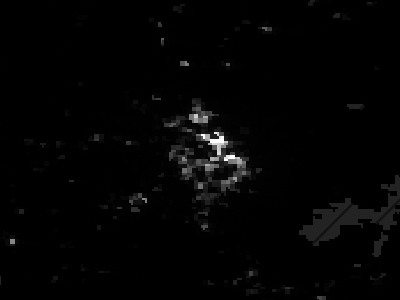

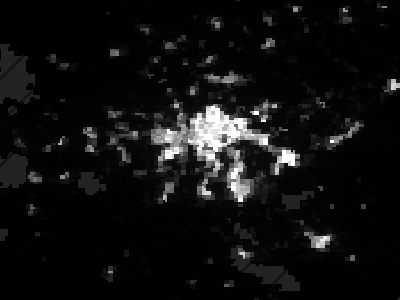

In [ ]:
# Define crop regions for Seville and Granada based on visual pixel coordinates
seville_crop = image_data.crop((300, 1000, 700, 1300))  # Seville region (left, upper, right, lower pixel coordinates)
granada_crop = image_data.crop((1590, 1100, 1990, 1400))   # Granada region

display(granada_crop, seville_crop)

## Convert Image to Grayscale and Array

In [ ]:
seville_gray = seville_crop.convert('L')
granada_gray = granada_crop.convert('L')


## Analyze Brightness in Seville vs. Granada regions

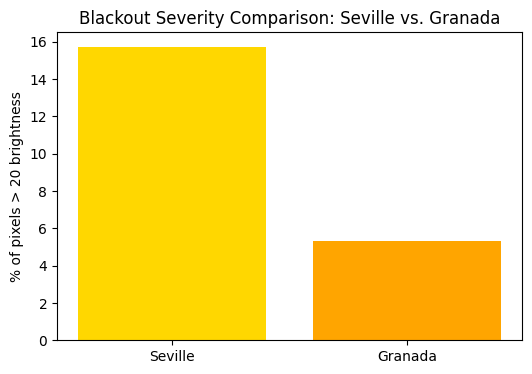

((np.float64(15.953975), np.float64(15.725)),
 (np.float64(3.65285), np.float64(5.298333333333334)))

In [ ]:
# Convert to numpy arrays
seville_array = np.array(seville_gray)
granada_array = np.array(granada_gray)
# Compute average brightness and fraction of pixels above threshold
seville_avg = seville_array.mean()
granada_avg = granada_array.mean()
seville_lit_frac = (seville_array > 20).sum() / seville_array.size
granada_lit_frac = (granada_array > 20).sum() / granada_array.size

# Plot comparison
plt.figure(figsize=(6, 4))
regions = ['Seville', 'Granada']
lit_pct = [seville_lit_frac * 100, granada_lit_frac * 100]
plt.bar(regions, lit_pct, color=['gold', 'orange'])
plt.ylabel('% of pixels > 20 brightness')
plt.title('Blackout Severity Comparison: Seville vs. Granada')
plt.show()

# Return computed stats
(seville_avg, seville_lit_frac * 100), (granada_avg, granada_lit_frac * 100)


## Object detection (image classification) with a Pre-Trained ML Model

In [ ]:
# Load the pre-trained ResNet50 model with weights trained on ImageNet
# (an open source dataset of labeled pictures, with 1,000 object categories like "zebra", "coffee mug", "laptop", etc.).)
model = ResNet50(weights='imagenet')

# I store the URL of the image to analyze:
image_url = 'https://d26itsb5vlqdeq.cloudfront.net//image/B6EA08E3-C012-FC1D-76E16306F40B7528'

# Download the image from the URL
resp = requests.get(image_url)

# Open the image and resize it to the required input size (224x224) for ResNet50
news_img = Image.open(BytesIO(resp.content)).resize((224, 224))

# Convert the image to a NumPy array and add an extra dimension for batch size (shape becomes (1, 224, 224, 3))
x = np.array(news_img)[None, ...]

# Preprocess the image for ResNet50 (scaling and normalization)
x = resnet50.preprocess_input(x.copy())  # bonus exercise: why don't you ask a LLM what does this line of python code mean in detail?

# Use the model to make a prediction on the input image
# This function performs forward propagation of the image and outputs a prediction vector of shape (1, 1000).
# The result is a probability distribution over the 1,000 possible classes.
preds = model.predict(x)

# Decode the top 3 predictions into human-readable labels
labels = resnet50.decode_predictions(preds, top=3)[0]

# Print the predictions
print('Predicted objects in image:')
for label, desc, prob in labels:
    print(f' - {desc}: {prob*100:.1f}%')  # Print each label's description and its confidence percentage

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Predicted objects in image:
 - basketball: 87.5%
 - volleyball: 7.3%
 - horizontal_bar: 1.2%


### Interpretation
The model predicts the main objects present in the image. For example, it might identify sports contexts, depending on the image. The quality of the detection depends on the similarity between the images in the training set of the algorithm and the images being tested. If the model does not "capture" the aspects we want, we need to:
- retrain the model (you are unlikely to ever do this: usually you won't have enough labeled data),
- "fine tune" the model (do a small training only to change the weights in the final layers),  
- change model altogether.

## Conclusion
- We loaded and viewed a real satellite image.
- We compared the extent of the severity of the recent blackout in Spain in two regions.
- We used a pre-trained ML model to classify content in a sport image.

Now try replacing images or modifying code to address your own questions!